In [295]:
import pandas as pd
from numpy.random import normal, uniform
import numpy as np
import matplotlib.pyplot as plt

In [296]:
features = ['Revenue', 'Cost of revenue', 'Net income', 'Earnings per share', 'Current assets', 'Total assets', 
        'Current liabilities', "Shareholders' equity", 'Depreciation & Amortization', 'Cash generated by operating activities', 
        'Cash at end of period', 'Stock price']



In [323]:
# Company 1: Each feature is constant with normal noise
df1 = pd.DataFrame()
years = []
for year in range(2008, 2019):
    years = np.concatenate((years, [year] * 3))
df1['Year'] = [int(year) for year in years]
df1['Quarter'] = [2, 3, 4] * 11
for feat in features:
    rand_mean = uniform(1000, 20000)
    rand_var = rand_mean / 20
    feat_values = normal(rand_mean, rand_var, 33)
    df1[feat] = [int(val) for val in feat_values]
df1['C1'] = 1
df1['C2'] = 0
df1['C3'] = 0
df1['C4'] = 0
df1['C5'] = 0
df1['C6'] = 0
df1.index = ['C1-' + str(i) for i in range(33)]

In [324]:
# Company 2: All features constant except for Net income and Stock price, which grow linearly over time (with normal noise)
df2 = df1.copy()
df2['C1'] = 0
df2['C2'] = 1
linear_feature = []
stock_price = []
for i in range(33):
    linear_feature.append(1000 + 400 * i + normal(0, 50 + 20 * i))
    stock_price.append(2000 + 50 * i + normal(0, 100 + 2.5 * i))
df2['Net income'] = [int(val) for val in linear_feature]
df2['Stock price'] = [int(val) for val in stock_price]
df2.index = ['C2-' + str(i) for i in range(33)]

In [325]:
# Company 3: All features grow linearly over time (with normal noise)
df3 = df1.copy()
df3['C1'] = 0
df3['C3'] = 1
for feat in features:
    feat_values = []
    rand_y_intercept = uniform(1000, 2000)
    rand_slope = uniform(50, 400)
    for i in range(33):
        rand_var = (rand_y_intercept + rand_slope * i) / 20
        feat_values.append(rand_y_intercept + rand_slope * i + normal(0, rand_var))
    df3[feat] = [int(val) for val in feat_values]
df3.index = ['C3-' + str(i) for i in range(33)]

In [326]:
# Company 4: All features constant except for Net income and Stock price, which grow exponentially over time (with normal noise)
df4 = df1.copy()
df4['C1'] = 0
df4['C4'] = 1
exp_feature = []
stock_price = []
for i in range(33):
    exp_feature.append(1000 * (1.07 ** (2 * i)) + normal(0, 50 * (1.07 ** (2 * i))))
    stock_price.append(2000 * (1.04 ** (2 * i)) + normal(0, 100 * (1.07 ** (2 * i))))
df4['Net income'] = [int(val) for val in exp_feature]
df4['Stock price'] = [int(val) for val in stock_price]
df4.index = ['C4-' + str(i) for i in range(33)]

In [327]:
# Company 5: All features grow exponentially over time (with normal noise)
df5 = df1.copy()
df5['C1'] = 0
df5['C5'] = 1
for feat in features:
    feat_values = []
    rand_initial = uniform(1000, 2000)
    rand_rate = uniform(1.04, 1.07)
    for i in range(33):
        rand_var = (rand_initial * (rand_rate ** (2 * i))) / 20
        feat_values.append(rand_initial * (rand_rate ** (2 * i)) + normal(0, rand_var))
    df5[feat] = [int(val) for val in feat_values]
df5.index = ['C5-' + str(i) for i in range(33)]

In [328]:
# Company 6: Some features are constant, some grow linearly, and some (including Stock price) grow exponentially
df6 = df1.copy()
df6['C1'] = 0
df6['C6'] = 1
for feat in features:
    growth_func = 2
    if feat != 'Stock price':
        growth_func = np.random.randint(3) # 0 = constant, 1 = linear, 2 = exponential
    feat_values = []
    if growth_func == 0:
        rand_mean = uniform(1000, 20000)
        rand_var = rand_mean / 20
        feat_values = normal(rand_mean, rand_var, 33)
    elif growth_func == 1:
        rand_y_intercept = uniform(1000, 2000)
        rand_slope = uniform(50, 400)
        for i in range(33):
            rand_var = (rand_y_intercept + rand_slope * i) / 20
            feat_values.append(rand_y_intercept + rand_slope * i + normal(0, rand_var))
    else:
        rand_initial = uniform(1000, 2000)
        rand_rate = uniform(1.04, 1.075)
        for i in range(33):
            rand_var = (rand_initial * (rand_rate ** (2 * i))) / 20
            feat_values.append(rand_initial * (rand_rate ** (2 * i)) + normal(0, rand_var))
    df6[feat] = [int(val) for val in feat_values]
df6.index = ['C6-' + str(i) for i in range(33)]

In [338]:
combined_df = pd.DataFrame()
for df in [df1, df2, df3, df4, df5, df6]:
    combined_df = combined_df.append(df)
df1.to_csv('Sample1.csv')
df2.to_csv('Sample2.csv')
df3.to_csv('Sample3.csv')
df4.to_csv('Sample4.csv')
df5.to_csv('Sample5.csv')
df6.to_csv('Sample6.csv')
combined_df.to_csv('Combined_Sample.csv')

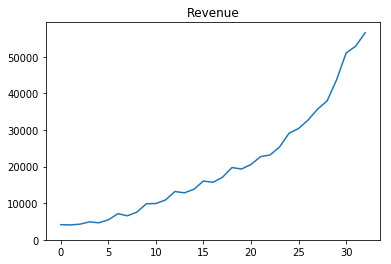

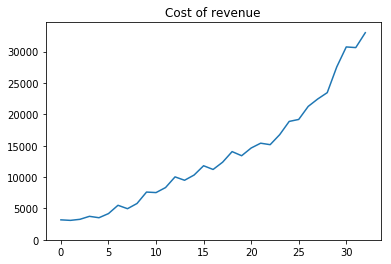

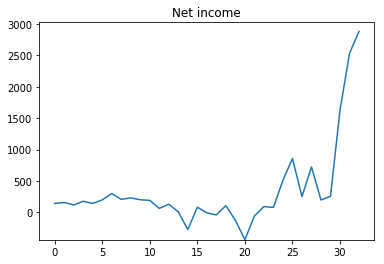

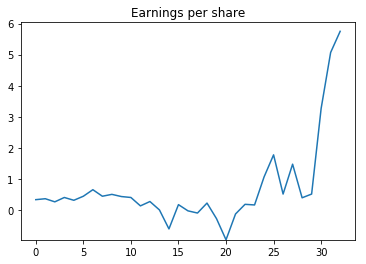

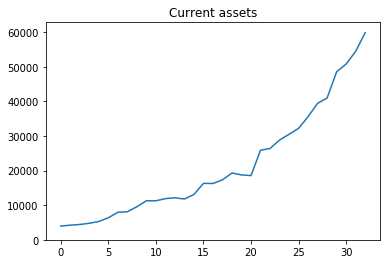

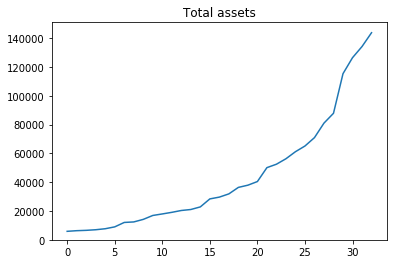

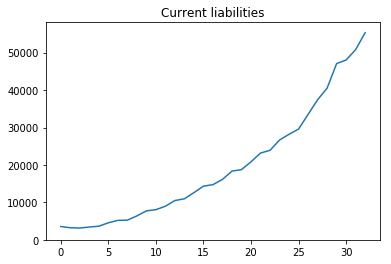

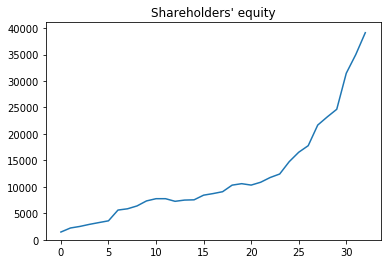

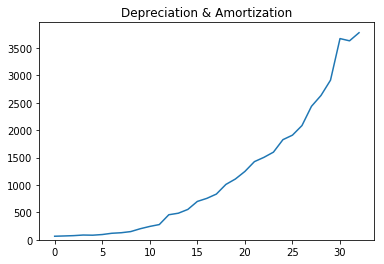

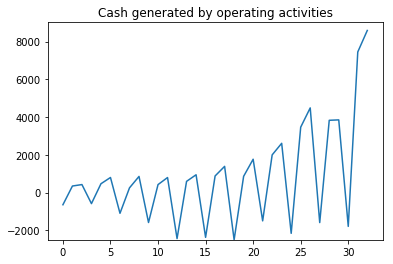

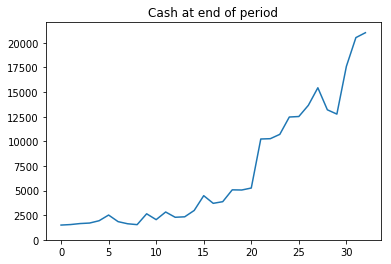

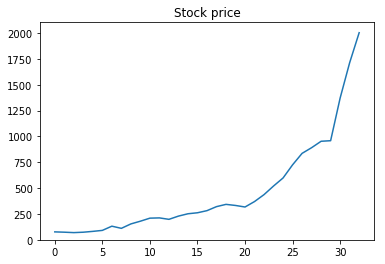

In [304]:
company_list = ['Amazon', 'AMD', 'Apple', 'Cisco', 'Google', 'IBM', 'Intel', 'Nvidia', 'TI']
company_name = 'Amazon'
company_num = company_list.index(company_name)
figure = 0
for feat in features:
    plt.figure(figure)
    plt.plot(range(33), combined[feat].tolist()[33 * company_num : 33 * (company_num + 1)])
    plt.title(feat)
    low_limit = min(0, min(combined[feat].tolist()[33 * company_num : 33 * (company_num + 1)]))
    high_limit = max(combined[feat].tolist()[33 * company_num : 33 * (company_num + 1)]) * 1.05
    plt.ylim(low_limit, high_limit)
    plt.show()